# Symptoms and COVID Presence

Dataset: https://www.kaggle.com/hemanthhari/symptoms-and-covid-presence

## Importing necessary packages

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow import keras
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from keras import models, layers
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import preprocessing
from tensorflow.keras.optimizers import SGD

## Reading dataset

In [2]:
dataset = pd.read_csv("Covid Dataset.csv")
dataset.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
dataset.shape

(5434, 21)

# Data processing

## Checking missing data

In [4]:
missing = dataset.isna()
missing.sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

## Remove unnecessary columns

In [5]:
# All values are False in both of these columns
dataset = dataset.drop('Wearing Masks', axis=1)
dataset = dataset.drop('Sanitization from Market', axis=1)

dataset.shape

(5434, 19)

## Removing duplicates

In [6]:
dropped = dataset.drop_duplicates().copy()
dropped.shape

(466, 19)

## Transformation dataset

### Original

In [7]:
for colName in dataset.columns:
    dataset[colName] = dataset[colName].map({'Yes': 1, 'No': 0})
    
dataset.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

### Dropped

In [9]:
for colName in dropped.columns:
    dropped[colName] = dropped[colName].map({'Yes': 1, 'No': 0})
    
dropped.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1


# Descriptive statistics

### Original

In [10]:
dataset.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,0.490063,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,0.499947,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dropped

In [11]:
dropped.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,0.643777,0.703863,0.718884,0.618026,0.495708,0.461373,0.500000,0.517167,0.497854,0.487124,0.482833,0.517167,0.465665,0.429185,0.461373,0.442060,0.491416,0.450644,0.826180
std,0.479397,0.457043,0.450027,0.486392,0.500519,0.499041,0.500537,0.500242,0.500533,0.500371,0.500242,0.500242,0.499356,0.495492,0.499041,0.497165,0.500464,0.498093,0.379362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Handling highly correlated features

### Original

[]


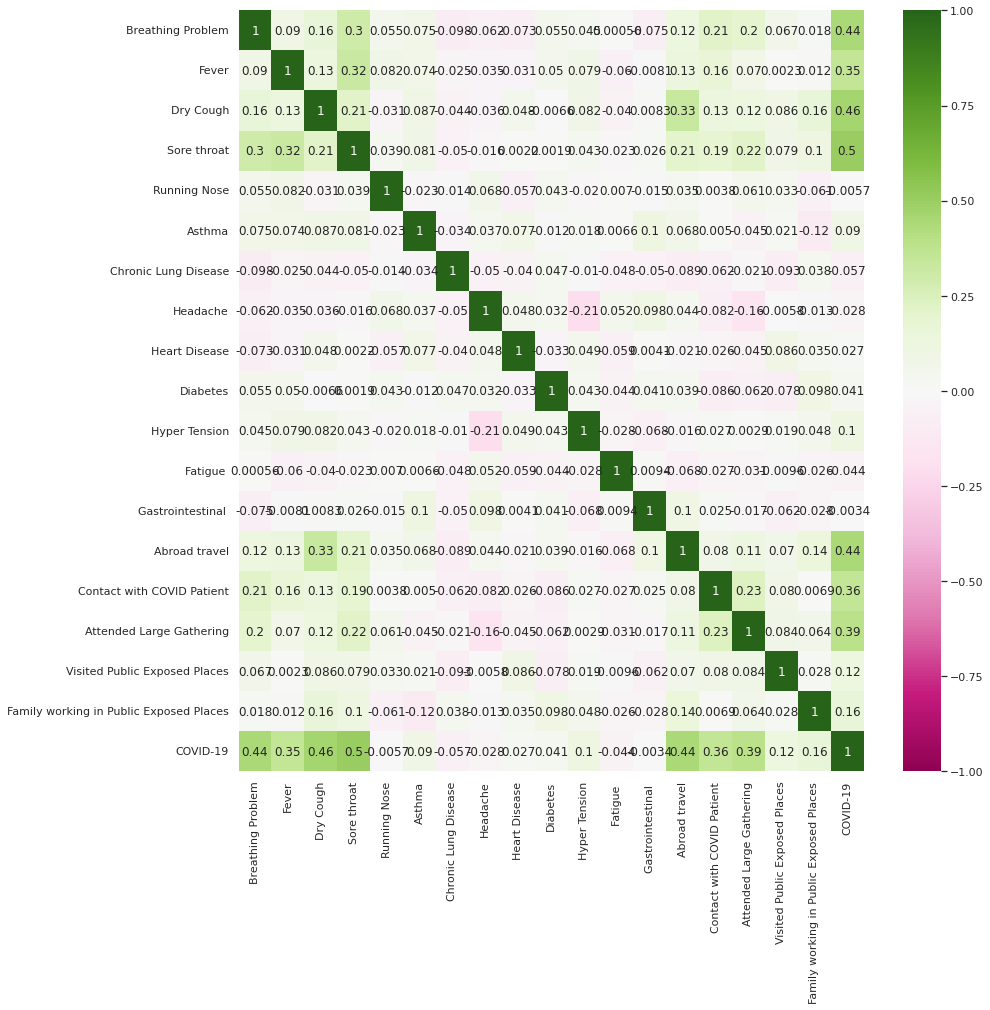

In [12]:
corr = dataset.corr()

sn.set(rc = {'figure.figsize':(14, 14)})
sn.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap="PiYG")

upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

sn.reset_orig()

array([[<AxesSubplot:title={'center':'Breathing Problem'}>,
        <AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Dry Cough'}>,
        <AxesSubplot:title={'center':'Sore throat'}>],
       [<AxesSubplot:title={'center':'Running Nose'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Chronic Lung Disease'}>,
        <AxesSubplot:title={'center':'Headache'}>],
       [<AxesSubplot:title={'center':'Heart Disease'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Hyper Tension'}>,
        <AxesSubplot:title={'center':'Fatigue '}>],
       [<AxesSubplot:title={'center':'Gastrointestinal '}>,
        <AxesSubplot:title={'center':'Abroad travel'}>,
        <AxesSubplot:title={'center':'Contact with COVID Patient'}>,
        <AxesSubplot:title={'center':'Attended Large Gathering'}>],
       [<AxesSubplot:title={'center':'Visited Public Exposed Places'}>,
        <AxesSubplot:title

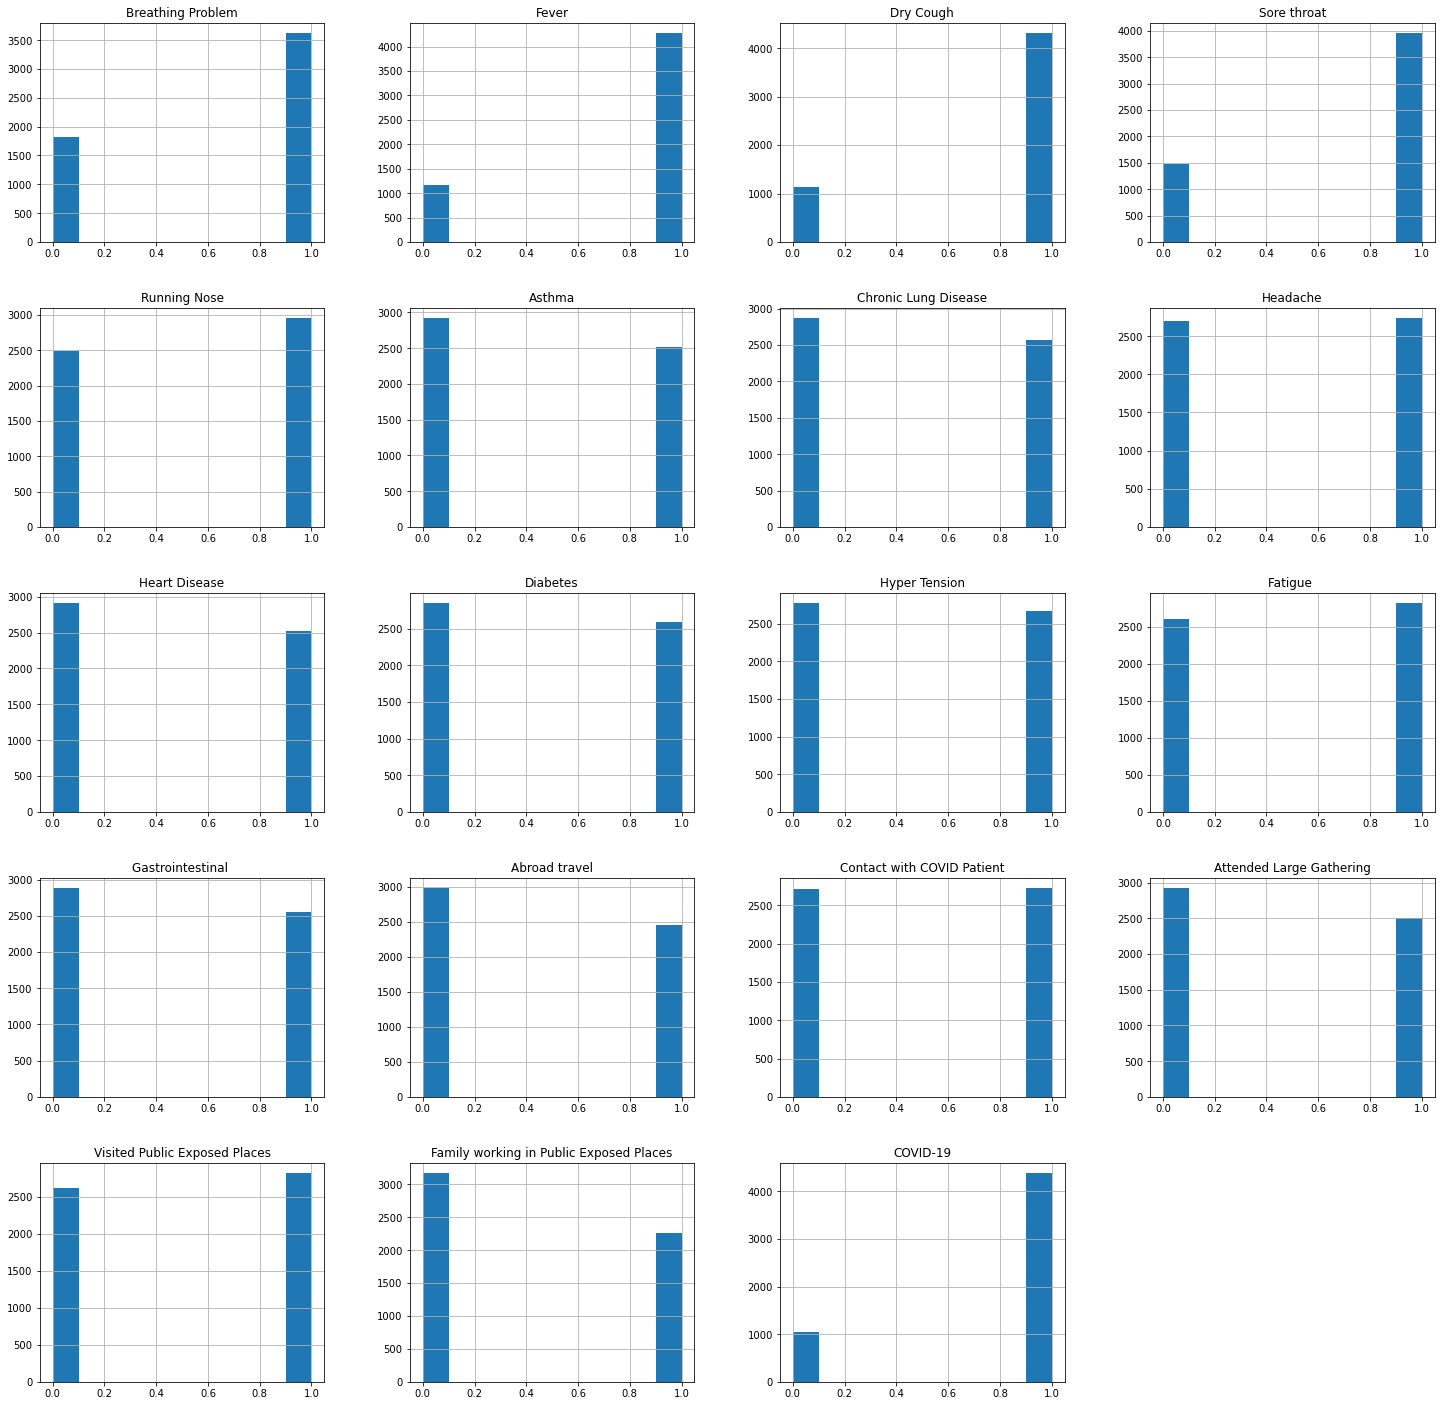

In [13]:
dataset.hist(figsize = (25,25))

### Dropped

[]


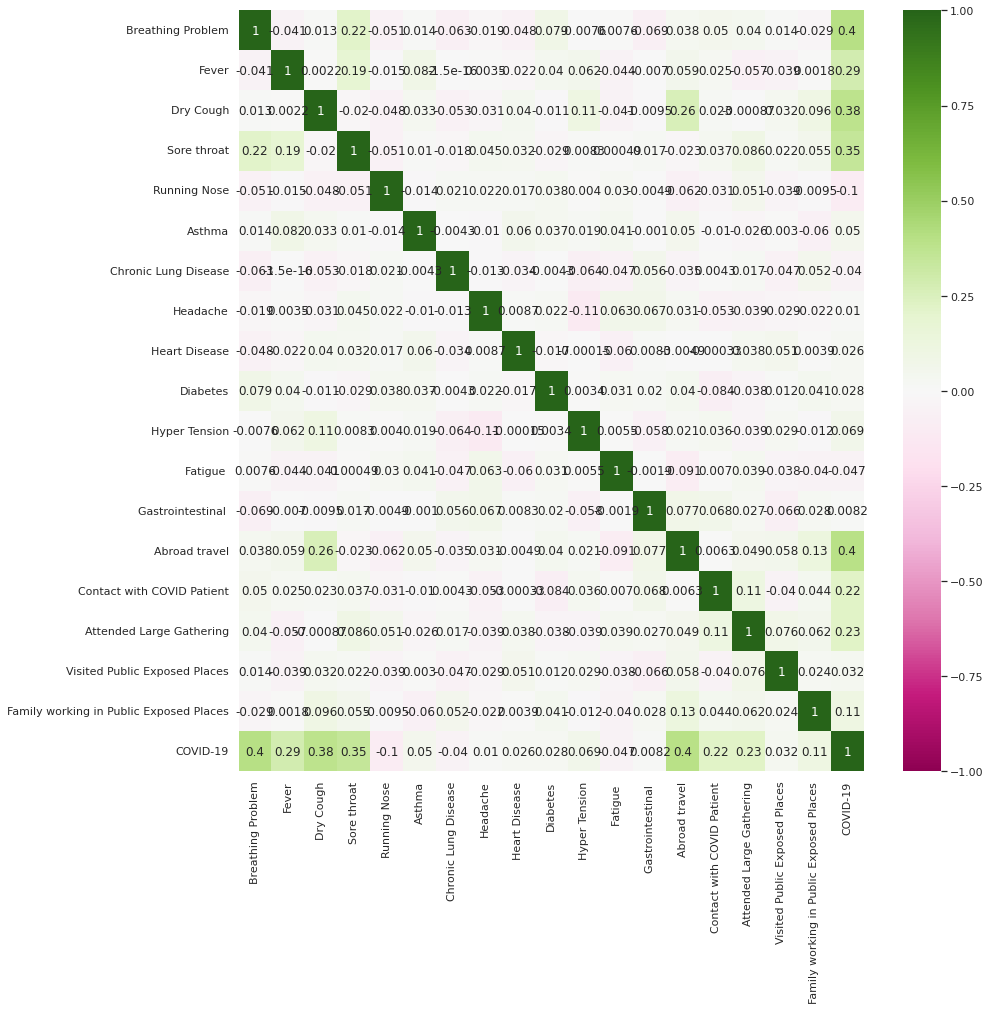

In [14]:
corr = dropped.corr()

sn.set(rc = {'figure.figsize':(14, 14)})
sn.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap="PiYG")

upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

sn.reset_orig()

array([[<AxesSubplot:title={'center':'Breathing Problem'}>,
        <AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Dry Cough'}>,
        <AxesSubplot:title={'center':'Sore throat'}>],
       [<AxesSubplot:title={'center':'Running Nose'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Chronic Lung Disease'}>,
        <AxesSubplot:title={'center':'Headache'}>],
       [<AxesSubplot:title={'center':'Heart Disease'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Hyper Tension'}>,
        <AxesSubplot:title={'center':'Fatigue '}>],
       [<AxesSubplot:title={'center':'Gastrointestinal '}>,
        <AxesSubplot:title={'center':'Abroad travel'}>,
        <AxesSubplot:title={'center':'Contact with COVID Patient'}>,
        <AxesSubplot:title={'center':'Attended Large Gathering'}>],
       [<AxesSubplot:title={'center':'Visited Public Exposed Places'}>,
        <AxesSubplot:title

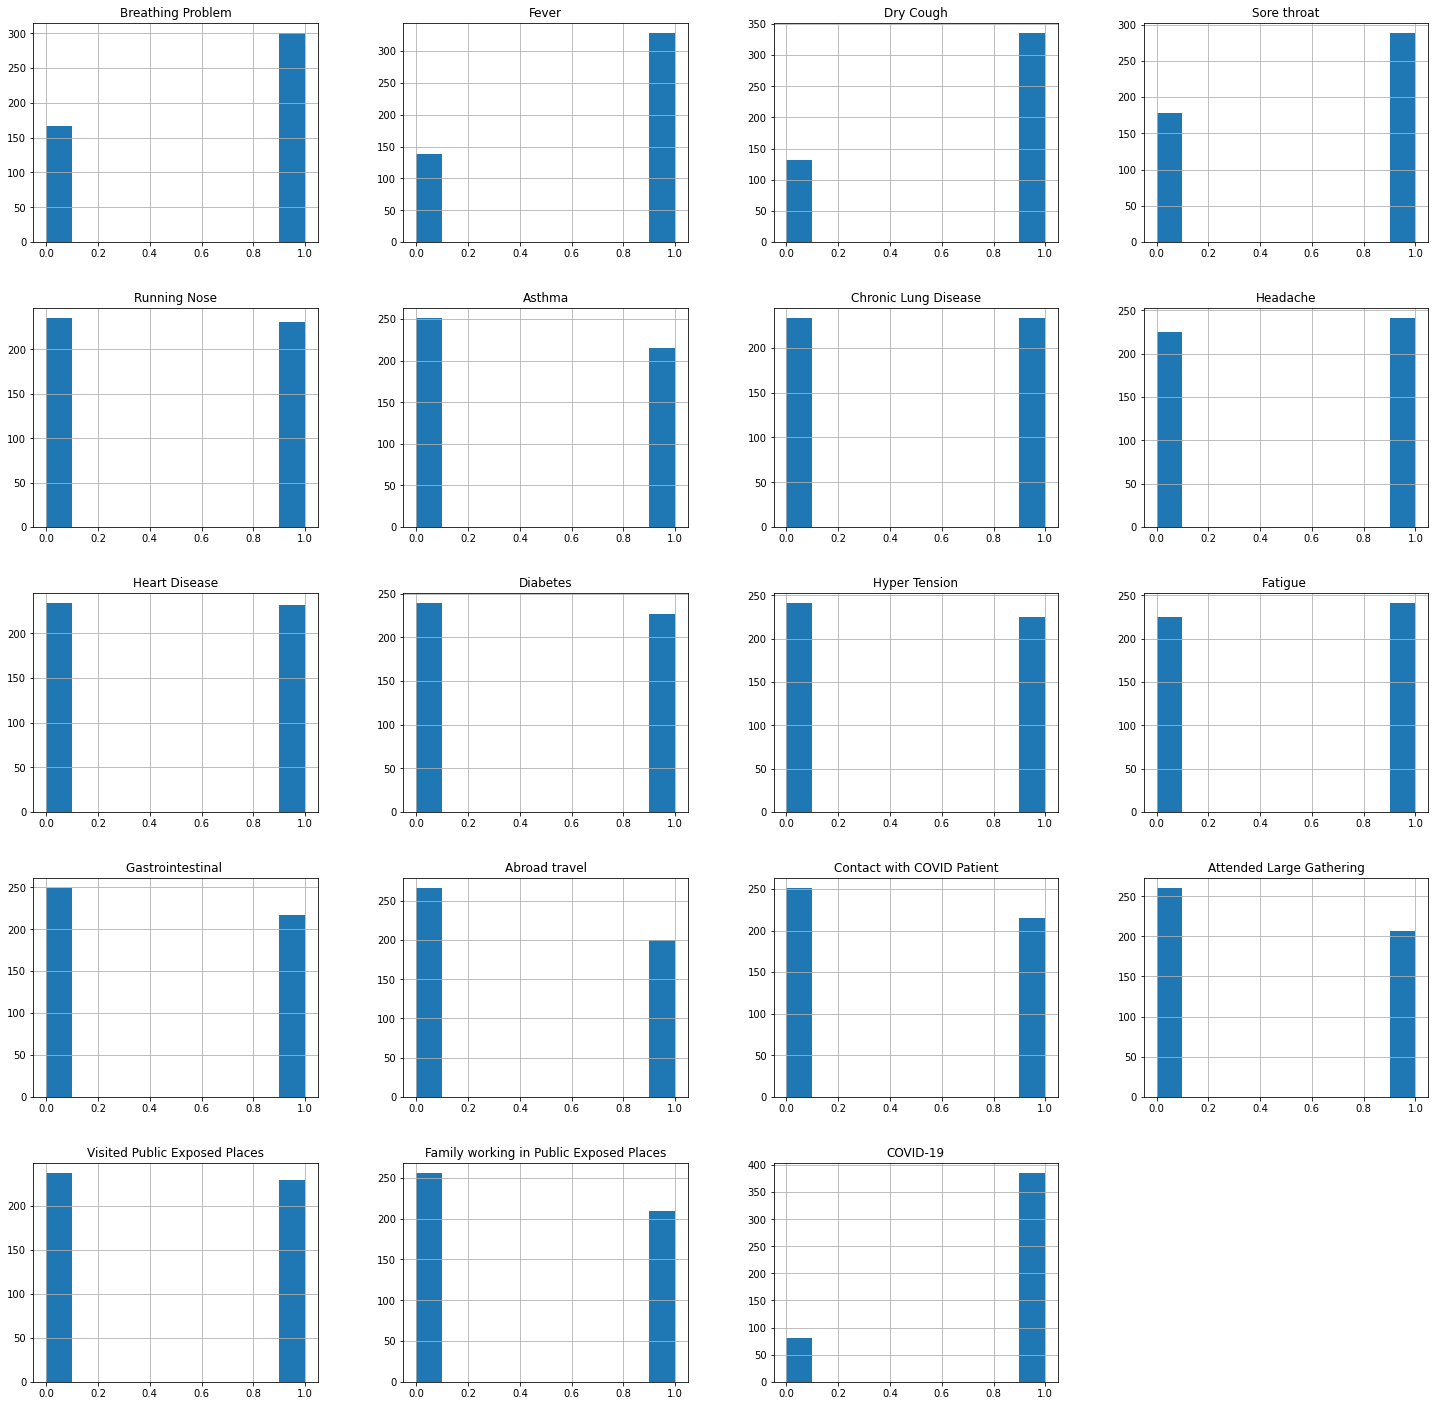

In [15]:
dropped.hist(figsize = (25,25))

# Additional functions

In [51]:
def printHistoryLoss(history_):
    training_loss = history_.history["loss"]
    test_loss = history_.history["val_loss"]
    
    epoch_count = range(1, len(training_loss) + 1)

    plt.plot(epoch_count, training_loss, "r--")
    plt.plot(epoch_count, test_loss, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show();

In [63]:
def printHistoryAcc(history_):
    training_accuracy = history_.history["accuracy"]
    test_accuracy = history_.history["val_accuracy"]

    epoch_count = range(1, len(training_accuracy) + 1)
    
    plt.plot(epoch_count, training_accuracy, "r--")
    plt.plot(epoch_count, test_accuracy, "b-")

    plt.legend(["Training Accuracy", "Test Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")
    plt.show();

# Split dataseta to train and test

## Original

In [122]:
X_original = dataset.drop("COVID-19", axis=1).values
y_original = dataset["COVID-19"].values

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size = 0.2, random_state = 1)

In [19]:
number_of_features = 18

# Neural networks

In [144]:
def createNetwork(loss="binary_crossentropy", optimizer="rmsprop", activation="relu"):
    network_ = models.Sequential()

    network_.add(layers.Dense(units=18, activation=activation, input_shape=(number_of_features,)))
    network_.add(layers.Dense(units=18, activation=activation))
    network_.add(layers.Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    
    return network_

Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.2982 - accuracy: 0.8459 - val_loss: 0.1463 - val_accuracy: 0.9439
Epoch 2/50
435/435 [==============================] - 0s 984us/step - loss: 0.1189 - accuracy: 0.9551 - val_loss: 0.0912 - val_accuracy: 0.9678
Epoch 3/50
435/435 [==============================] - 0s 979us/step - loss: 0.0884 - accuracy: 0.9643 - val_loss: 0.0748 - val_accuracy: 0.9770
Epoch 4/50
435/435 [==============================] - 0s 960us/step - loss: 0.0763 - accuracy: 0.9717 - val_loss: 0.0675 - val_accuracy: 0.9770
Epoch 5/50
435/435 [==============================] - 0s 961us/step - loss: 0.0703 - accuracy: 0.9731 - val_loss: 0.0583 - val_accuracy: 0.9853
Epoch 6/50
435/435 [==============================] - 0s 940us/step - loss: 0.0630 - accuracy: 0.9749 - val_loss: 0.0736 - val_accuracy: 0.9641
Epoch 7/50
435/435 [==============================] - 0s 952us/step - loss: 0.0610 - accuracy: 0.9754 - val_loss: 0.0552 - val_accuracy: 0

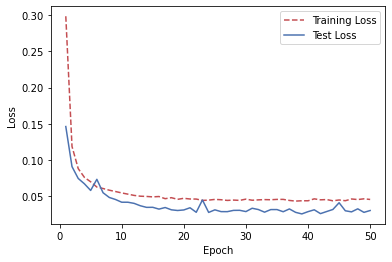

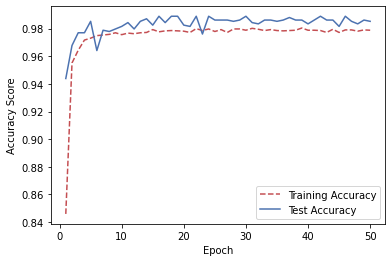

In [66]:
network = createNetwork()

history = network.fit(X_train_original, # Features
     y_train_original, # Target vector
     epochs=50, # Number of epochs
     verbose=1, # Print description after each epoch
     batch_size=10, # Number of observations per batch
     validation_data=(X_test_original, y_test_original)) # Test data

printHistoryLoss(history)
printHistoryAcc(history)

Epoch 1/100
435/435 [==============================] - 1s 1ms/step - loss: 0.2100 - accuracy: 0.9071 - val_loss: 0.0951 - val_accuracy: 0.9669
Epoch 2/100
435/435 [==============================] - 1s 1ms/step - loss: 0.0772 - accuracy: 0.9689 - val_loss: 0.0480 - val_accuracy: 0.9834
Epoch 3/100
435/435 [==============================] - 1s 1ms/step - loss: 0.0632 - accuracy: 0.9715 - val_loss: 0.0397 - val_accuracy: 0.9844
Epoch 4/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0568 - accuracy: 0.9752 - val_loss: 0.0357 - val_accuracy: 0.9862
Epoch 5/100
435/435 [==============================] - 1s 1ms/step - loss: 0.0537 - accuracy: 0.9765 - val_loss: 0.0377 - val_accuracy: 0.9862
Epoch 6/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9779 - val_loss: 0.0531 - val_accuracy: 0.9788
Epoch 7/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9761 - val_loss: 0.0471 - val_accuracy: 0.9825

Epoch 58/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9795 - val_loss: 0.0252 - val_accuracy: 0.9862
Epoch 59/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9798 - val_loss: 0.0340 - val_accuracy: 0.9862
Epoch 60/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9798 - val_loss: 0.0250 - val_accuracy: 0.9862
Epoch 61/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9811 - val_loss: 0.0244 - val_accuracy: 0.9853
Epoch 62/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9793 - val_loss: 0.0244 - val_accuracy: 0.9890
Epoch 63/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9800 - val_loss: 0.0230 - val_accuracy: 0.9890
Epoch 64/100
435/435 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9793 - val_loss: 0.0473 - val_accuracy:

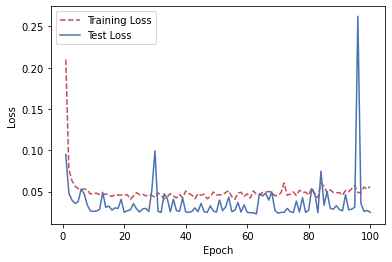

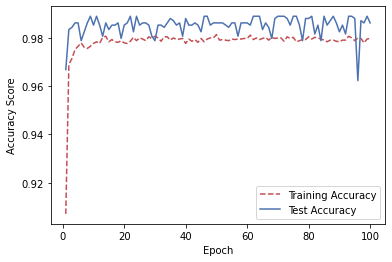

In [64]:
network1 = models.Sequential()

network1.add(layers.Dense(units=18, activation="relu", input_shape=(number_of_features,)))
network1.add(layers.Dense(units=18, activation="relu"))
network1.add(layers.Dense(units=18, activation="relu"))
network1.add(layers.Dense(units=18, activation="relu"))
network1.add(layers.Dense(units=18, activation="relu"))
network1.add(layers.Dense(units=18, activation="relu"))
network1.add(layers.Dense(units=1, activation="sigmoid"))

network1.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history1 = network1.fit(X_train_original, # Features
     y_train_original, # Target vector
     epochs=100, # Number of epochs
     verbose=1, # Print description after each epoch
     batch_size=10, # Number of observations per batch
     validation_data=(X_test_original, y_test_original)) # Test data

printHistoryLoss(history1)
printHistoryAcc(history1)

## k-Fold Cross-validation

In [78]:
neural_network = KerasClassifier(build_fn=createNetwork, epochs=10, batch_size=100, verbose=0)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cross_val_score(neural_network, X_original, y_original, cv=kf, n_jobs=-1)

C:\Users\Nikola\AppData\Local\Temp/ipykernel_13080/3110022443.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasClassifier(build_fn=createNetwork, epochs=10, batch_size=100, verbose=0)


array([0.96320146, 0.96412146, 0.97332108, 0.95676172, 0.96685082])

## Hyperparameters tuning using Grid Search

In [91]:
neural_network = KerasClassifier(build_fn=createNetwork, verbose=0)

epochs = [5, 10, 20, 50]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, cv=kf, n_jobs=-1)

grid_result = grid.fit(X_original, y_original)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Nikola\AppData\Local\Temp/ipykernel_13080/1174968145.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasClassifier(build_fn=createNetwork, verbose=0)


Best: 0.981413 using {'batch_size': 100, 'epochs': 50, 'optimizer': 'adam'}


### With scaled data

In [99]:
scaler = preprocessing.StandardScaler()

features_standardized = scaler.fit_transform(X_original)

neural_network = KerasClassifier(build_fn=createNetwork, verbose=0)

epochs = [5, 10, 20, 50]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, cv=kf, n_jobs=-1)

grid_result = grid.fit(features_standardized, y_original)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Nikola\AppData\Local\Temp/ipykernel_13080/1741933824.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasClassifier(build_fn=createNetwork, verbose=0)


Best: 0.982701 using {'batch_size': 5, 'epochs': 50, 'optimizer': 'rmsprop'}


In [100]:
neural_network = KerasClassifier(build_fn=createNetwork, epochs=50, batch_size=5, verbose=0)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cross_val_score(neural_network, X_original, y_original, cv=kf, n_jobs=-1)

C:\Users\Nikola\AppData\Local\Temp/ipykernel_13080/4015723794.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasClassifier(build_fn=createNetwork, epochs=50, batch_size=5, verbose=0)


array([0.97792089, 0.98160076, 0.98528057, 0.97700089, 0.97697973])

## Early stopping

Epoch 1/150
44/44 - 1s - loss: 0.6760 - accuracy: 0.5746 - val_loss: 0.5353 - val_accuracy: 0.8197 - 513ms/epoch - 12ms/step
Epoch 2/150
44/44 - 0s - loss: 0.4657 - accuracy: 0.8111 - val_loss: 0.4107 - val_accuracy: 0.8022 - 70ms/epoch - 2ms/step
Epoch 3/150
44/44 - 0s - loss: 0.3781 - accuracy: 0.8134 - val_loss: 0.3484 - val_accuracy: 0.8169 - 64ms/epoch - 1ms/step
Epoch 4/150
44/44 - 0s - loss: 0.3130 - accuracy: 0.8406 - val_loss: 0.2792 - val_accuracy: 0.8546 - 64ms/epoch - 1ms/step
Epoch 5/150
44/44 - 0s - loss: 0.2447 - accuracy: 0.8889 - val_loss: 0.2118 - val_accuracy: 0.9154 - 69ms/epoch - 2ms/step
Epoch 6/150
44/44 - 0s - loss: 0.1890 - accuracy: 0.9344 - val_loss: 0.1630 - val_accuracy: 0.9365 - 64ms/epoch - 1ms/step
Epoch 7/150
44/44 - 0s - loss: 0.1535 - accuracy: 0.9390 - val_loss: 0.1341 - val_accuracy: 0.9365 - 71ms/epoch - 2ms/step
Epoch 8/150
44/44 - 0s - loss: 0.1308 - accuracy: 0.9487 - val_loss: 0.1189 - val_accuracy: 0.9522 - 67ms/epoch - 2ms/step
Epoch 9/150
44

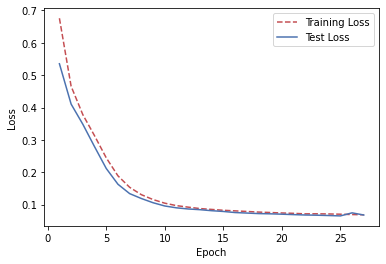

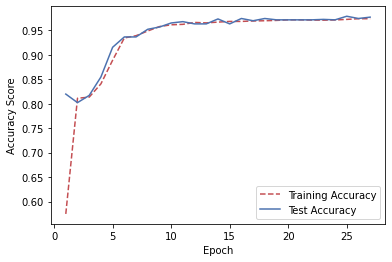

In [131]:
network = createNetwork()

callbacks = [EarlyStopping(monitor="val_loss", patience=2), 
                 ModelCheckpoint(filepath="best_model.h5", 
                                 monitor="val_loss", 
                                 save_best_only=True)]

history = network.fit(X_train_original,
     y_train_original,
     epochs=150,
     callbacks=callbacks,
     verbose=2,
     batch_size=100, 
     validation_data=(X_test_original, y_test_original))

printHistoryLoss(history)
printHistoryAcc(history)

### Loading best model and make prediction

In [134]:
network = load_model("best_model.h5")

network.summary()

predicted_target = network.predict(X_test_original)

correct = 0
incorrect = 0

for i in range(predicted_target.shape[0]):
    if (predicted_target[i] > 0.5 and 1 == y_test_original[i]):
        correct+=1
    elif (predicted_target[i] < 0.5 and 0 == y_test_original[i]):
        correct+=1
    else:
        incorrect+=1
        
print("Correct: " + str(correct))
print("Incorrect: " + str(incorrect))
print("Accuracy: " + str(correct / predicted_target.shape[0]))

network.evaluate(X_test_original, y_test_original)

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_315 (Dense)           (None, 18)                342       
                                                                 
 dense_316 (Dense)           (None, 18)                342       
                                                                 
 dense_317 (Dense)           (None, 1)                 19        
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Correct: 1064
Incorrect: 23
Accuracy: 0.9788408463661453
34/34 [==============================] - 0s 700us/step - loss: 0.0652 - accuracy: 0.9788


[0.06516057997941971, 0.9788408279418945]

## Tunning learning rate and momentum

In [156]:
def create_model(learn_rate=0.01, momentum=0):
    network_ = models.Sequential()

    network_.add(layers.Dense(units=18, activation="relu", input_shape=(number_of_features,)))
    network_.add(layers.Dense(units=18, activation="relu"))
    network_.add(layers.Dense(units=1, activation="sigmoid"))
    
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
    network_.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return network_

model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=0)

learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=kf)
grid_result = grid.fit(X_original, y_original)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Nikola\AppData\Local\Temp/ipykernel_13080/584410916.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=0)


Best: 0.981596 using {'learn_rate': 0.1, 'momentum': 0.0}


## Experimenting with different activation functions

In [152]:
model = KerasClassifier(build_fn=createNetwork, epochs=30, batch_size=10, verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=kf)
grid_result = grid.fit(X_original, y_original)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Nikola\AppData\Local\Temp/ipykernel_13080/1968358258.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=createNetwork, epochs=30, batch_size=10, verbose=0)


Best: 0.981413 using {'activation': 'relu'}


## Different network architectures

Epoch 1/30
435/435 [==============================] - 2s 3ms/step - loss: 0.1325 - accuracy: 0.9473 - val_loss: 0.0562 - val_accuracy: 0.9724
Epoch 2/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0608 - accuracy: 0.9740 - val_loss: 0.0583 - val_accuracy: 0.9788
Epoch 3/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0573 - accuracy: 0.9733 - val_loss: 0.0307 - val_accuracy: 0.9871
Epoch 4/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0547 - accuracy: 0.9765 - val_loss: 0.0389 - val_accuracy: 0.9844
Epoch 5/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0537 - accuracy: 0.9772 - val_loss: 0.0355 - val_accuracy: 0.9844
Epoch 6/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0531 - accuracy: 0.9772 - val_loss: 0.0291 - val_accuracy: 0.9834
Epoch 7/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0519 - accuracy: 0.9768 - val_loss: 0.0461 - val_accuracy: 0.9724
Epoch 

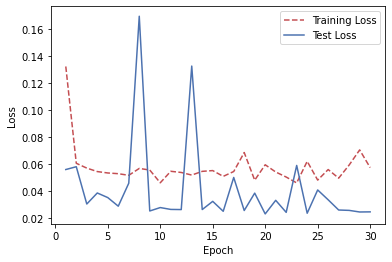

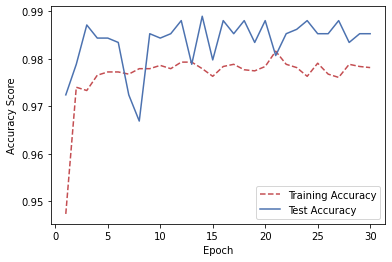

In [154]:
network2 = models.Sequential()

network2.add(layers.Dense(units=256, activation="relu", input_shape=(number_of_features,)))
network2.add(layers.Dense(units=128, activation="relu"))
network2.add(layers.Dense(units=64, activation="relu"))
network2.add(layers.Dense(units=32, activation="relu"))
network2.add(layers.Dense(units=16, activation="relu"))
network2.add(layers.Dense(units=8, activation="relu"))
network2.add(layers.Dense(units=1, activation="sigmoid"))

network2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history2 = network2.fit(X_train_original,
     y_train_original,
     epochs=30,
     verbose=1,
     batch_size=10, 
     validation_data=(X_test_original, y_test_original))

printHistoryLoss(history2)
printHistoryAcc(history2)

Epoch 1/30
435/435 [==============================] - 1s 1ms/step - loss: 0.1461 - accuracy: 0.9388 - val_loss: 0.0507 - val_accuracy: 0.9752
Epoch 2/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0633 - accuracy: 0.9761 - val_loss: 0.0358 - val_accuracy: 0.9825
Epoch 3/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0573 - accuracy: 0.9756 - val_loss: 0.0399 - val_accuracy: 0.9816
Epoch 4/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0564 - accuracy: 0.9758 - val_loss: 0.0410 - val_accuracy: 0.9834
Epoch 5/30
435/435 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9749 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 6/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0513 - accuracy: 0.9772 - val_loss: 0.0363 - val_accuracy: 0.9798
Epoch 7/30
435/435 [==============================] - 1s 1ms/step - loss: 0.0484 - accuracy: 0.9775 - val_loss: 0.0267 - val_accuracy: 0.9853
Epoch 

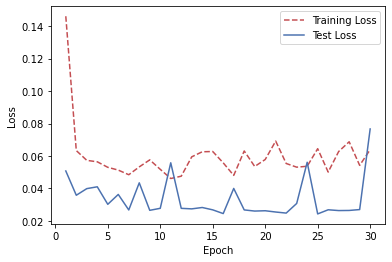

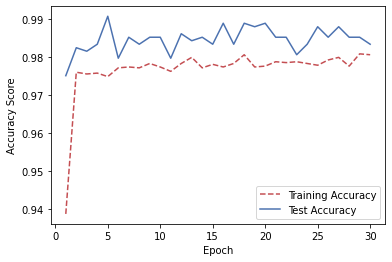

In [155]:
network3 = models.Sequential()

network3.add(layers.Dense(units=108, activation="relu", input_shape=(number_of_features,)))
network3.add(layers.Dense(units=90, activation="relu"))
network3.add(layers.Dense(units=72, activation="relu"))
network3.add(layers.Dense(units=54, activation="relu"))
network3.add(layers.Dense(units=36, activation="relu"))
network3.add(layers.Dense(units=18, activation="relu"))
network3.add(layers.Dense(units=1, activation="sigmoid"))

network3.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history3 = network3.fit(X_train_original,
     y_train_original,
     epochs=30,
     verbose=1,
     batch_size=10, 
     validation_data=(X_test_original, y_test_original))

printHistoryLoss(history3)
printHistoryAcc(history3)

## Custom loss function

In [ ]:
def customLoss(y_true, y_pred):
    